In [1]:
import numpy as np
from model_lstm import GridTorch
import torch
%pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
dic = torch.load('../data/torch/1-99.pt')
target_pos, target_hd = dic['target_pos'], dic['target_hd'] 
init_pos, init_hd, ego_vel = dic['init_pos'], dic['init_hd'], dic['ego_vel']

In [3]:
len(target_pos)


10000

In [4]:
idcs = []
idc_norms = []
used_idcs = set()
start_pos = target_pos[1]
idx = 1
while True:
    used_idcs.add(idx)
    idcs.append(idx)
    pos = target_pos[idx]
    hd = target_hd[idx]
    end_pos = pos[-1]
    end_hd = hd[-1]
    norms = np.linalg.norm(end_pos - init_pos, axis=1) + np.linalg.norm(np.sin(end_hd) - np.sin(init_hd), axis=1)
    sorted_norm_idx = np.argsort(norms)
    for n in sorted_norm_idx:
        if not n in used_idcs:
            idx = n
            break
    idc_norms.append(norms[idx])
    if len(used_idcs) == len(target_pos):
        break
    
    
    


/home/lucas/anaconda3/envs/diss/lib/python3.6/site-packages/numpy/linalg/linalg.py:2378: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(add.reduce(s, axis=axis, keepdims=keepdims))


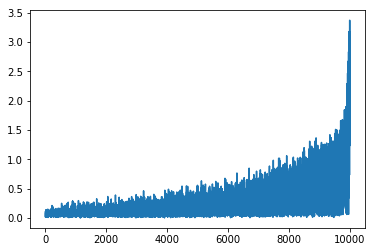

In [5]:
plt.plot(idc_norms)

In [36]:
%matplotlib qt

array([1.62367857, 1.659981  , 1.69288863, 1.71134724, 1.74173983,
       1.76162603, 1.7765894 , 1.79525697, 1.82371115, 1.87428885,
       1.90701081, 1.94758681, 1.9703281 , 2.00351884, 2.04480684,
       2.0858312 , 2.11823675, 2.16112106, 2.1905467 , 2.24504612,
       2.26994572, 2.30089031, 2.34965751, 2.40028799, 2.43681866,
       2.44865858, 2.42655137, 2.38585205, 2.33590526, 2.28697797,
       2.21404539, 2.15827568, 2.08599293, 2.03865839, 2.00612369,
       1.96727877, 1.93193426, 1.8907462 , 1.86090314, 1.83310583,
       1.79254983, 1.74746726, 1.71339252, 1.6609081 , 1.6293116 ,
       1.59035874, 1.56843936, 1.55142625, 1.51712166, 1.48233339,
       1.43629378, 1.39574937, 1.36290377, 1.34141073, 1.31424571,
       1.30751616, 1.30070288, 1.28856159, 1.29285532, 1.31907197,
       1.33278777, 1.35205514, 1.36943732, 1.39563726, 1.42127675,
       1.45224309, 1.49781117, 1.54193231, 1.58628978, 1.63534147,
       1.69794967, 1.73627587, 1.77381877, 1.8185391 , 1.85057

In [40]:
f = plt.figure()
f.set_figheight(5)
f.set_figwidth(5)
tp = target_pos.reshape(-1, 2)[:30000]
c = np.linalg.norm(tp - np.array([-1.1, -1.1]), axis=1)
plt.scatter(tp.T[0], tp.T[1], s=0.4, c=c, alpha=1., cmap='brg')
plt.xticks([])
plt.yticks([])


([], <a list of 0 Text yticklabel objects>)

In [78]:
stitched_vels = np.concatenate(ego_vel[idcs[:300]])
stitched_targets_pos = np.concatenate(target_pos[idcs[:300]])
stitched_targets_hd = np.concatenate(target_hd[idcs[:300]])
init_position = init_pos[0]
init_direction = init_hd[0]

In [79]:
out_dict = {
    "stitched_vels" : stitched_vels,
"stitched_targets_pos":stitched_targets_pos,
"stitched_targets_hd":stitched_targets_hd,
"init_position":init_position,
"init_direction":init_direction,

}

In [81]:
np.save('../data/stitched_dict_2.npy', out_dict)